# Модуль А

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет.

In [ ]:
weather = pd.read_csv('weather.csv')

In [ ]:
weather.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

Посмотрим общую информацию о данных.

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Предобработка данных

Отобразим количество недостающих данных, в таблице.

In [ ]:
total = weather.isnull().sum().sort_values(ascending=False)
percent = (weather.isnull().sum()/weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(21)

2021-06-15 09:57:56.115 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


Total   Percent
Sunshine       69835  0.480098
Evaporation    62790  0.431665
Cloud3pm       59358  0.408071
Cloud9am       55888  0.384216
Pressure9am    15065  0.103568
Pressure3pm    15028  0.103314
WindDir9am     10566  0.072639
WindGustDir    10326  0.070989
WindGustSpeed  10263  0.070555
Humidity3pm     4507  0.030984
WindDir3pm      4228  0.029066
Temp3pm         3609  0.024811
RainTomorrow    3267  0.022460
RainToday       3261  0.022419
Rainfall        3261  0.022419
WindSpeed3pm    3062  0.021050
Humidity9am     2654  0.018246
WindSpeed9am    1767  0.012148
Temp9am         1767  0.012148
MinTemp         1485  0.010209
MaxTemp         1261  0.008669

Удалим те признаки в которых процент отсутствующих значений больше 15.

In [ ]:
weather = weather.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)

Отобразим матрицу корреляции в стиле тепловой карты

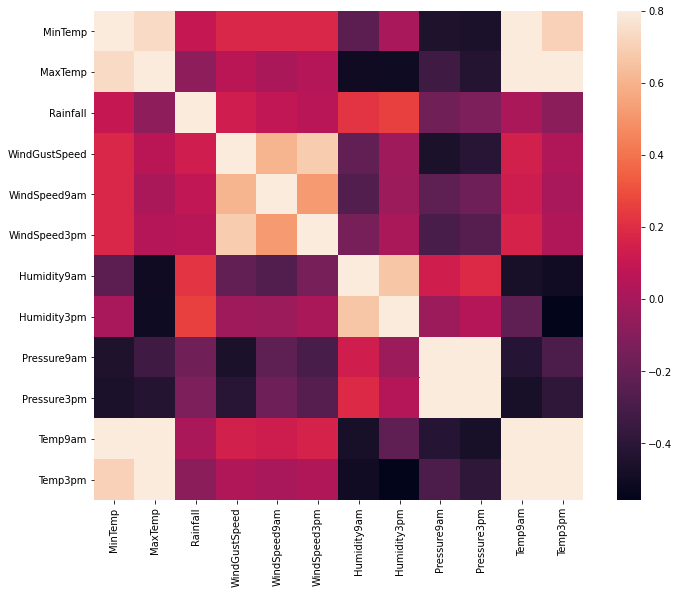

In [ ]:
corrmat = weather.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Привлекают внимание несколько белых квадратов. Temp9am и Temp3pm сильно коррелируют с Max и Min Temp, можно их удалить. Так же выделяется признак Pressure. Удалим Pressure9am т.к. в нем больше пропусков. Так же очень похожими кажутся признаки WindX оставим WindGustSpeed т. к. он лучше коррелирует с другими признаками Wind. Так же поступим с MinTemp  и Humadity3pm

In [ ]:
weather = weather.drop(['Temp9am', 'Temp3pm'],1)
weather = weather.drop('Pressure9am',1)
weather = weather.drop(['WindSpeed9am', 'WindSpeed3pm'],1)

Просмотрим оставшиеся признаки с пропущенными значениями.

In [ ]:
total = weather.isnull().sum().sort_values(ascending=False)
percent = (weather.isnull().sum()/weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(21)

Total   Percent
Pressure3pm    15028  0.103314
WindDir9am     10566  0.072639
WindGustDir    10326  0.070989
WindGustSpeed  10263  0.070555
Humidity3pm     4507  0.030984
WindDir3pm      4228  0.029066
RainTomorrow    3267  0.022460
RainToday       3261  0.022419
Rainfall        3261  0.022419
Humidity9am     2654  0.018246
MinTemp         1485  0.010209
MaxTemp         1261  0.008669
Location           0  0.000000
Date               0  0.000000

Так как признак Rain нам нужно предсказать мы не можем заполнить его, удалим строки в которых признаки отсутствуют.

In [ ]:
weather = weather.drop(weather.loc[weather['RainToday'].isnull()].index)
weather = weather.drop(weather.loc[weather['RainTomorrow'].isnull()].index)

Заменим пропуски в числовых признаках на среднее значение.

In [ ]:
weather['Pressure3pm'] = weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['WindGustSpeed'] = weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())
weather['Rainfall'] = weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Humidity3pm'] = weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Humidity9am'] = weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['MinTemp'] = weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp'] = weather['MaxTemp'].fillna(weather['MaxTemp'].mean())

Заменим пропущенные значения в категориальных признаках на самые популярные значения найденные с помощью weather[X].value_counts()

In [ ]:
weather['WindDir9am'] = weather['WindDir9am'].fillna('N')
weather['WindDir3pm'] = weather['WindDir3pm'].fillna('SE')
weather['WindGustDir'] = weather['WindGustDir'].fillna('W')

Посмотрим описательную статистику по оставшимся столбцам.

In [ ]:
weather.describe()

MinTemp        MaxTemp  ...    Humidity3pm    Pressure3pm
count  140787.000000  140787.000000  ...  140787.000000  140787.000000
mean       12.184824      23.235120  ...      51.449288    1015.257760
std         6.393226       7.106739  ...      20.546968       6.682526
min        -8.500000      -4.800000  ...       0.000000     977.100000
25%         7.600000      17.900000  ...      37.000000    1011.000000
50%        12.000000      22.700000  ...      51.449288    1015.255889
75%        16.800000      28.200000  ...      65.000000    1019.400000
max        33.900000      48.100000  ...     100.000000    1039.600000

[8 rows x 7 columns]

## Визуализация данных

In [ ]:
import seaborn as sns

In [ ]:
real_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure3pm']

Построим гистограммы распределения вещественных признаков.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e706fec90>,
      dtype=object)

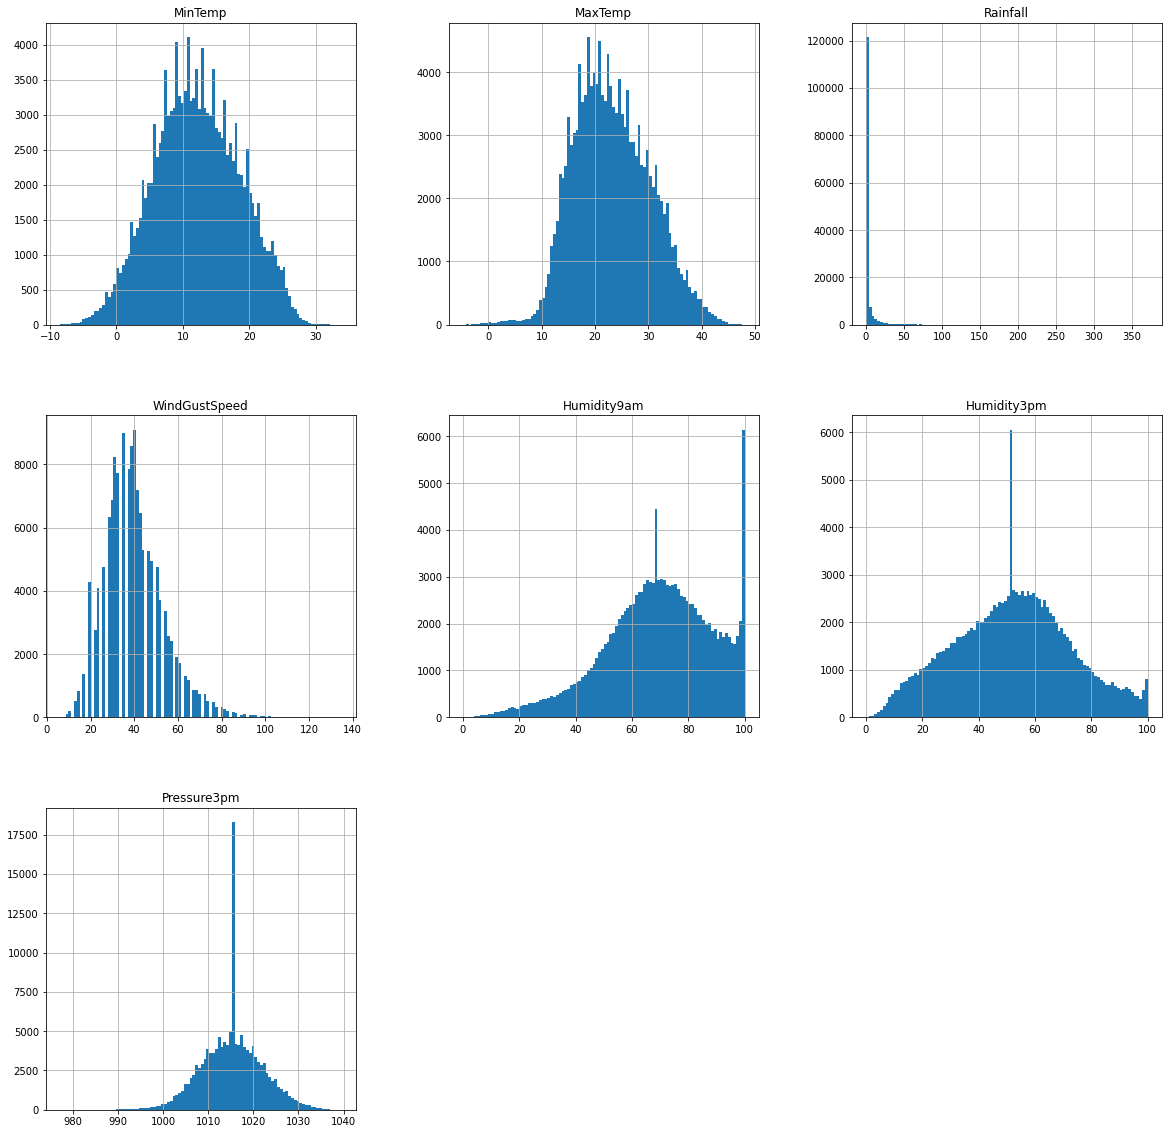

In [ ]:
weather[real_features].hist(figsize=(20, 20), bins=100)

Из всех признаков сильнее всего от нормального распределения отличаются Rainfall и Humidity9am.

Построим попарные диаграммы рассеивания признаков.

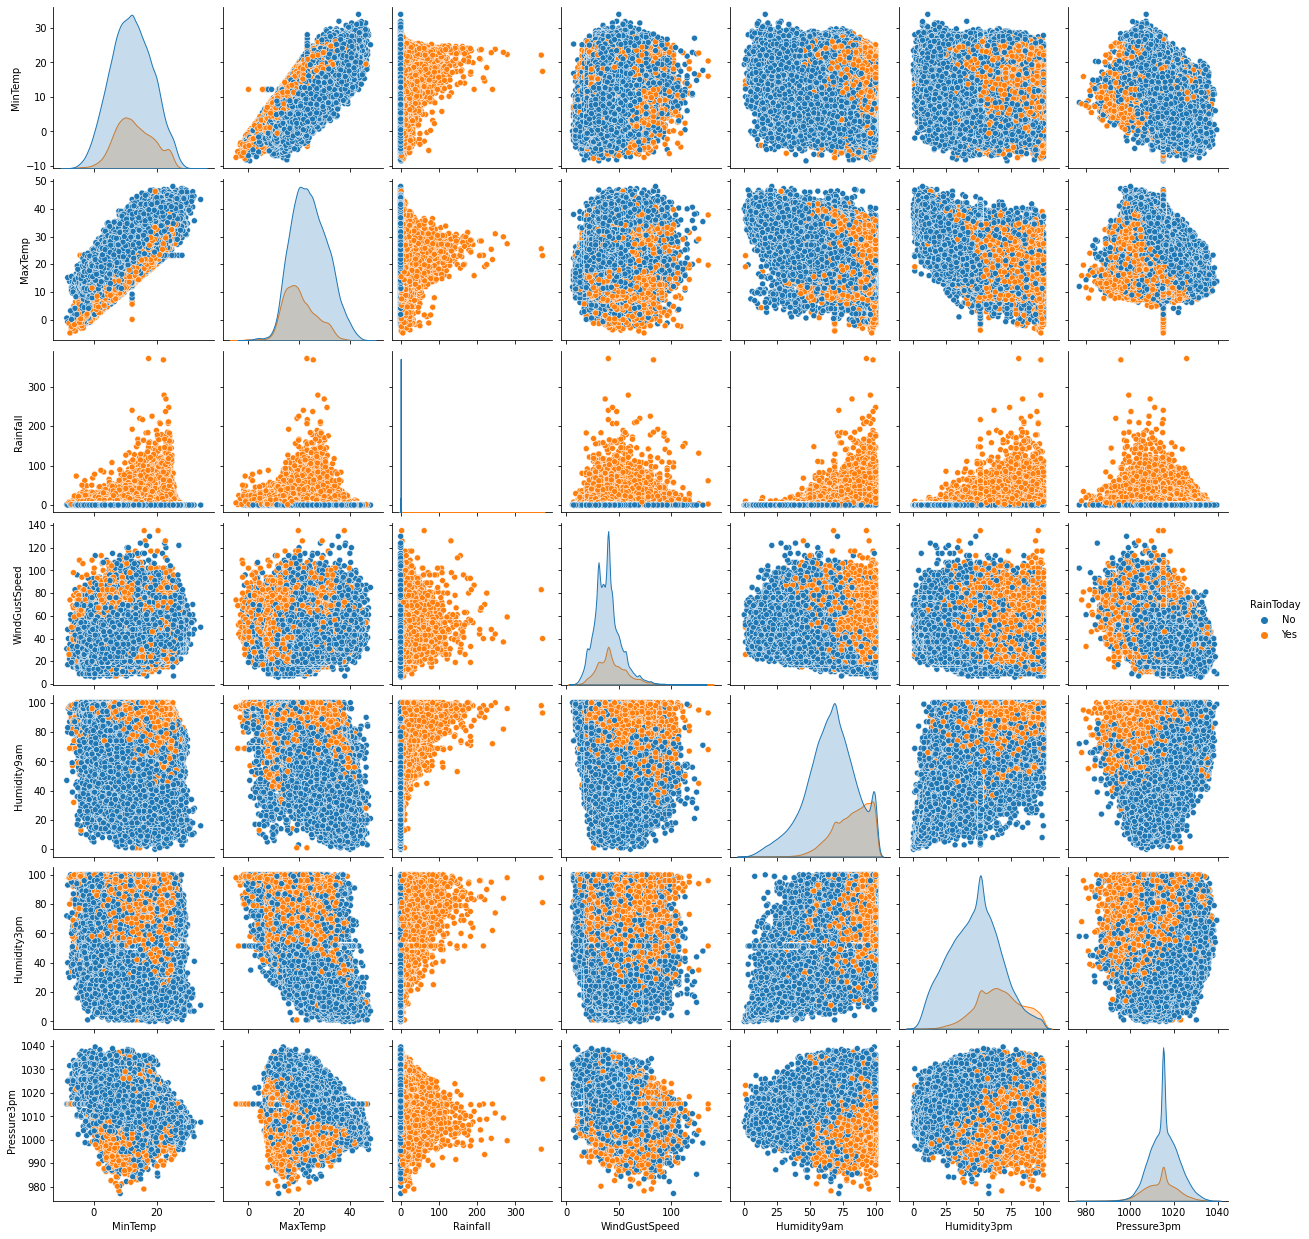

In [ ]:
sns.pairplot(weather, hue='RainToday')

# Модуль B

На стадии обработки данных, в модуле А было уменьшено количество признаков, с помощью матрицы корреляции, представленной в виде тепловой карты.

In [ ]:
weather.head()

Location  Rainfall WindGustDir  ...  RainTomorrow MeanTemp MeanHumidity
0   Albury       0.6           W  ...            No    18.15         46.5
1   Albury       0.0         WNW  ...            No    16.25         34.5
2   Albury       0.0         WSW  ...            No    19.30         34.0
3   Albury       0.0          NE  ...            No    18.60         30.5
4   Albury       1.0           W  ...            No    24.90         57.5

[5 rows x 11 columns]

Найдём среднее значение между признаками MinTemp и MaxTemp, между Humidity9am и Humidity3pm и заменим на признаки MeanTemp и MeanHumidity.

In [ ]:
weather['MeanTemp']= (weather['MinTemp'] + weather['MaxTemp'])/2
weather['MeanHumidity'] = (weather['Humidity9am'] + weather['Humidity3pm'])/2

In [ ]:
weather = weather.drop(['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm'],1)

Удалим признак Date т.к. он ни на что не влияет.

In [ ]:
weather = weather.drop('Date',1)

Разделим от выборки целевой признак, который требуется предсказать. Целевой признак - RainTomorrow.

In [ ]:
y = weather['RainTomorrow']
X = weather.drop('RainTomorrow',1)

## Кодирование категориальных признаков

In [ ]:
from sklearn.feature_extraction import DictVectorizer as DV

Выделим категориальные и числовые признаки.

In [ ]:
category_cols = X.select_dtypes(['object']).columns
numerical_cols = X.select_dtypes(['float64', 'int64']).columns

In [ ]:
category_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [ ]:
X_cat = X[category_cols]
X_num = X[numerical_cols]

Перекодируем категориальные признаки one-hot encoding.

In [ ]:
weather['Location'].value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
MelbourneAirport    3009
PerthAirport        3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Portland            2984
Woomera             2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
GoldCoast           2924
Witchcliffe         2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


In [ ]:
encoder = DV(sparse = False)
cat_encoded = encoder.fit_transform(X_cat.T.to_dict().values())
print(cat_encoded)

[[0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
cat_encoded = pd.DataFrame(cat_encoded)
cat_encoded = cat_encoded.reset_index(drop=True)

In [ ]:
X_num = X_num.reset_index(drop=True)

In [ ]:
X_encoded = pd.concat([cat_encoded,X_num],axis = 1)

In [ ]:
X_encoded

0    1    2    3  ...  WindGustSpeed  Pressure3pm  MeanTemp  MeanHumidity
0       0.0  0.0  1.0  0.0  ...           44.0       1007.1     18.15          46.5
1       0.0  0.0  1.0  0.0  ...           44.0       1007.8     16.25          34.5
2       0.0  0.0  1.0  0.0  ...           46.0       1008.7     19.30          34.0
3       0.0  0.0  1.0  0.0  ...           24.0       1012.8     18.60          30.5
4       0.0  0.0  1.0  0.0  ...           41.0       1006.0     24.90          57.5
...     ...  ...  ...  ...  ...            ...          ...       ...           ...
140782  0.0  0.0  0.0  0.0  ...           31.0       1021.2     12.65          43.0
140783  0.0  0.0  0.0  0.0  ...           31.0       1020.3     13.10          37.5
140784  0.0  0.0  0.0  0.0  ...           22.0       1019.1     14.45          38.5
140785  0.0  0.0  0.0  0.0  ...           37.0       1016.8     16.15          38.5
140786  0.0  0.0  0.0  0.0  ...           28.0       1016.5     17.40          37.5

[140787 rows x 104 columns]

In [ ]:
y = pd.DataFrame(y)

In [ ]:
y = y.reset_index(drop=True)

Заменим значения в RainTomorrow Yes - 1, No - 0.

In [ ]:
for i in range(len(y)):
  if(y['RainTomorrow'][i] =='No'):
    y['RainTomorrow'][i] = 0
  else:
    y['RainTomorrow'][i] = 1

In [ ]:
y = y.astype('int')

Разделим выборку на обучение и тестирование, с помощью sklearn.model_selection.train_test_split. Эта функция разделяет выборку и перемешивает, поэтому я выбрал этот способ разделения.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X_encoded, y,test_size = 0.2, random_state = 0)

In [ ]:
y_test

RainTomorrow
4552               0
38208              0
129692             0
19249              0
31335              0
...              ...
5865               0
49694              0
19896              0
20224              0
81956              0

[28158 rows x 1 columns]

## Выбор модели классификации.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

### Метод k ближайших соседей.

Осуществляется с помощью sklearn.neighbors.KNeighborsClassifier. Ссылка на документацию: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Модель показала хороший результат.

Попробуем улучшить результат, подобрав параметры случайным образом, так как выборка большая поиск по сетке будет происходить очень долго.

In [ ]:
knc = KNeighborsClassifier(n_neighbors= 9,algorithm='brute', metric='manhattan',n_jobs=-1)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[20504  1309]
 [ 3474  2871]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21813
           1       0.69      0.45      0.55      6345

    accuracy                           0.83     28158
   macro avg       0.77      0.70      0.72     28158
weighted avg       0.82      0.83      0.82     28158



Последовало небольшое улучшение результата, но все еще хуже, чем у 2-х других моделей.

### Метод классификации случайного леса.

Осуществляется с помощью sklearn.ensemble.RandomForestClassifier. Ссылка на документацию: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[20809  1004]
 [ 3438  2907]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21813
           1       0.74      0.46      0.57      6345

    accuracy                           0.84     28158
   macro avg       0.80      0.71      0.74     28158
weighted avg       0.83      0.84      0.83     28158



Результат лучше, чем у прошлой модели. Посмотрим можно ли его улучшить. Подберём параметры, как и в предыдущей модели.

In [ ]:
rfc = RandomForestClassifier(max_depth=40, n_estimators=500, criterion='entropy', n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[20828   985]
 [ 3436  2909]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21813
           1       0.75      0.46      0.57      6345

    accuracy                           0.84     28158
   macro avg       0.80      0.71      0.74     28158
weighted avg       0.83      0.84      0.83     28158



Подбором параметров не удалось существенно улучшить модель.

### Градиентный бустинг.

Осуществляется с помощью sklearn.ensemble.GradientBoostingClassifier. Ссылка на документацию: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html.

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[20722  1091]
 [ 3505  2840]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21813
           1       0.72      0.45      0.55      6345

    accuracy                           0.84     28158
   macro avg       0.79      0.70      0.73     28158
weighted avg       0.83      0.84      0.82     28158



Результат, практически, такой же как и у случайного леса. Попробуем подобрать параметры.

In [ ]:
gbc = GradientBoostingClassifier(loss='exponential',n_estimators=500)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[20643  1170]
 [ 3296  3049]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21813
           1       0.72      0.48      0.58      6345

    accuracy                           0.84     28158
   macro avg       0.79      0.71      0.74     28158
weighted avg       0.83      0.84      0.83     28158



Результат практически не отличается от случайного леса, поэтому ключевой моделью будет RandomForestClassifier.